In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
    
%matplotlib inline

## Creating dataframe 

In [4]:
# csv containing Q_table
Q_Table_nonfoveated = pd.read_csv('Q_tables/Q_table_nonfoveated.csv', sep=',')
Q_Table_strong = pd.read_csv('Q_tables/Q_table_strongfoveated.csv', sep=',')
Q_Table_weak = pd.read_csv('Q_tables/Q_table_weakfoveated.csv', sep=',')

nonfoveated = Q_Table_nonfoveated['score']

strong_center = Q_Table_strong['(5, 5)']
weak_center = Q_Table_weak['(5, 5)']
weak_mean = Q_Table_weak.mean(axis=1)
weak_std = Q_Table_weak.std(axis=1)

# first element of each row is the name
strong_random = pd.Series([np.random.choice(i[1:]) for i in Q_Table_strong.values])
strong_min = pd.Series([np.min(i[1:]) for i in Q_Table_strong.values])
weak_random = pd.Series([np.random.choice(i[1:]) for i in Q_Table_weak.values])
weak_min = pd.Series([np.min(i[1:]) for i in Q_Table_weak.values])

df = pd.concat([nonfoveated, strong_center, strong_random, strong_min, 
                weak_center, weak_random, weak_min, weak_mean, weak_std], axis=1)
df.columns = ['nonfoveated', 'strong_center', 'strong_random', 'strong_min', 
              'weak_center', 'weak_random', 'weak_min', 'weak_mean', 'weak_std']
print(df.head(5))

   nonfoveated  strong_center  strong_random  strong_min  weak_center  \
0     0.000876       0.423583       4.900845    0.423583     0.002218   
1     0.000200       0.876008       1.102027    0.196425     0.002384   
2     0.000903       3.360202       6.481915    3.360202     0.061000   
3     0.293198       6.084228       7.700525    4.752276     0.687513   
4     0.126650       5.714087       3.570253    1.972432     0.622785   

   weak_random  weak_min  weak_mean  weak_std  
0     0.122736  0.000349   0.084672  0.142489  
1     0.196001  0.001883   0.076758  0.155156  
2     1.840408  0.005068   1.920881  1.904206  
3     1.533616  0.687513   1.329307  0.459307  
4     0.443546  0.033303   0.285762  0.202173  


# Plots

## No foveation

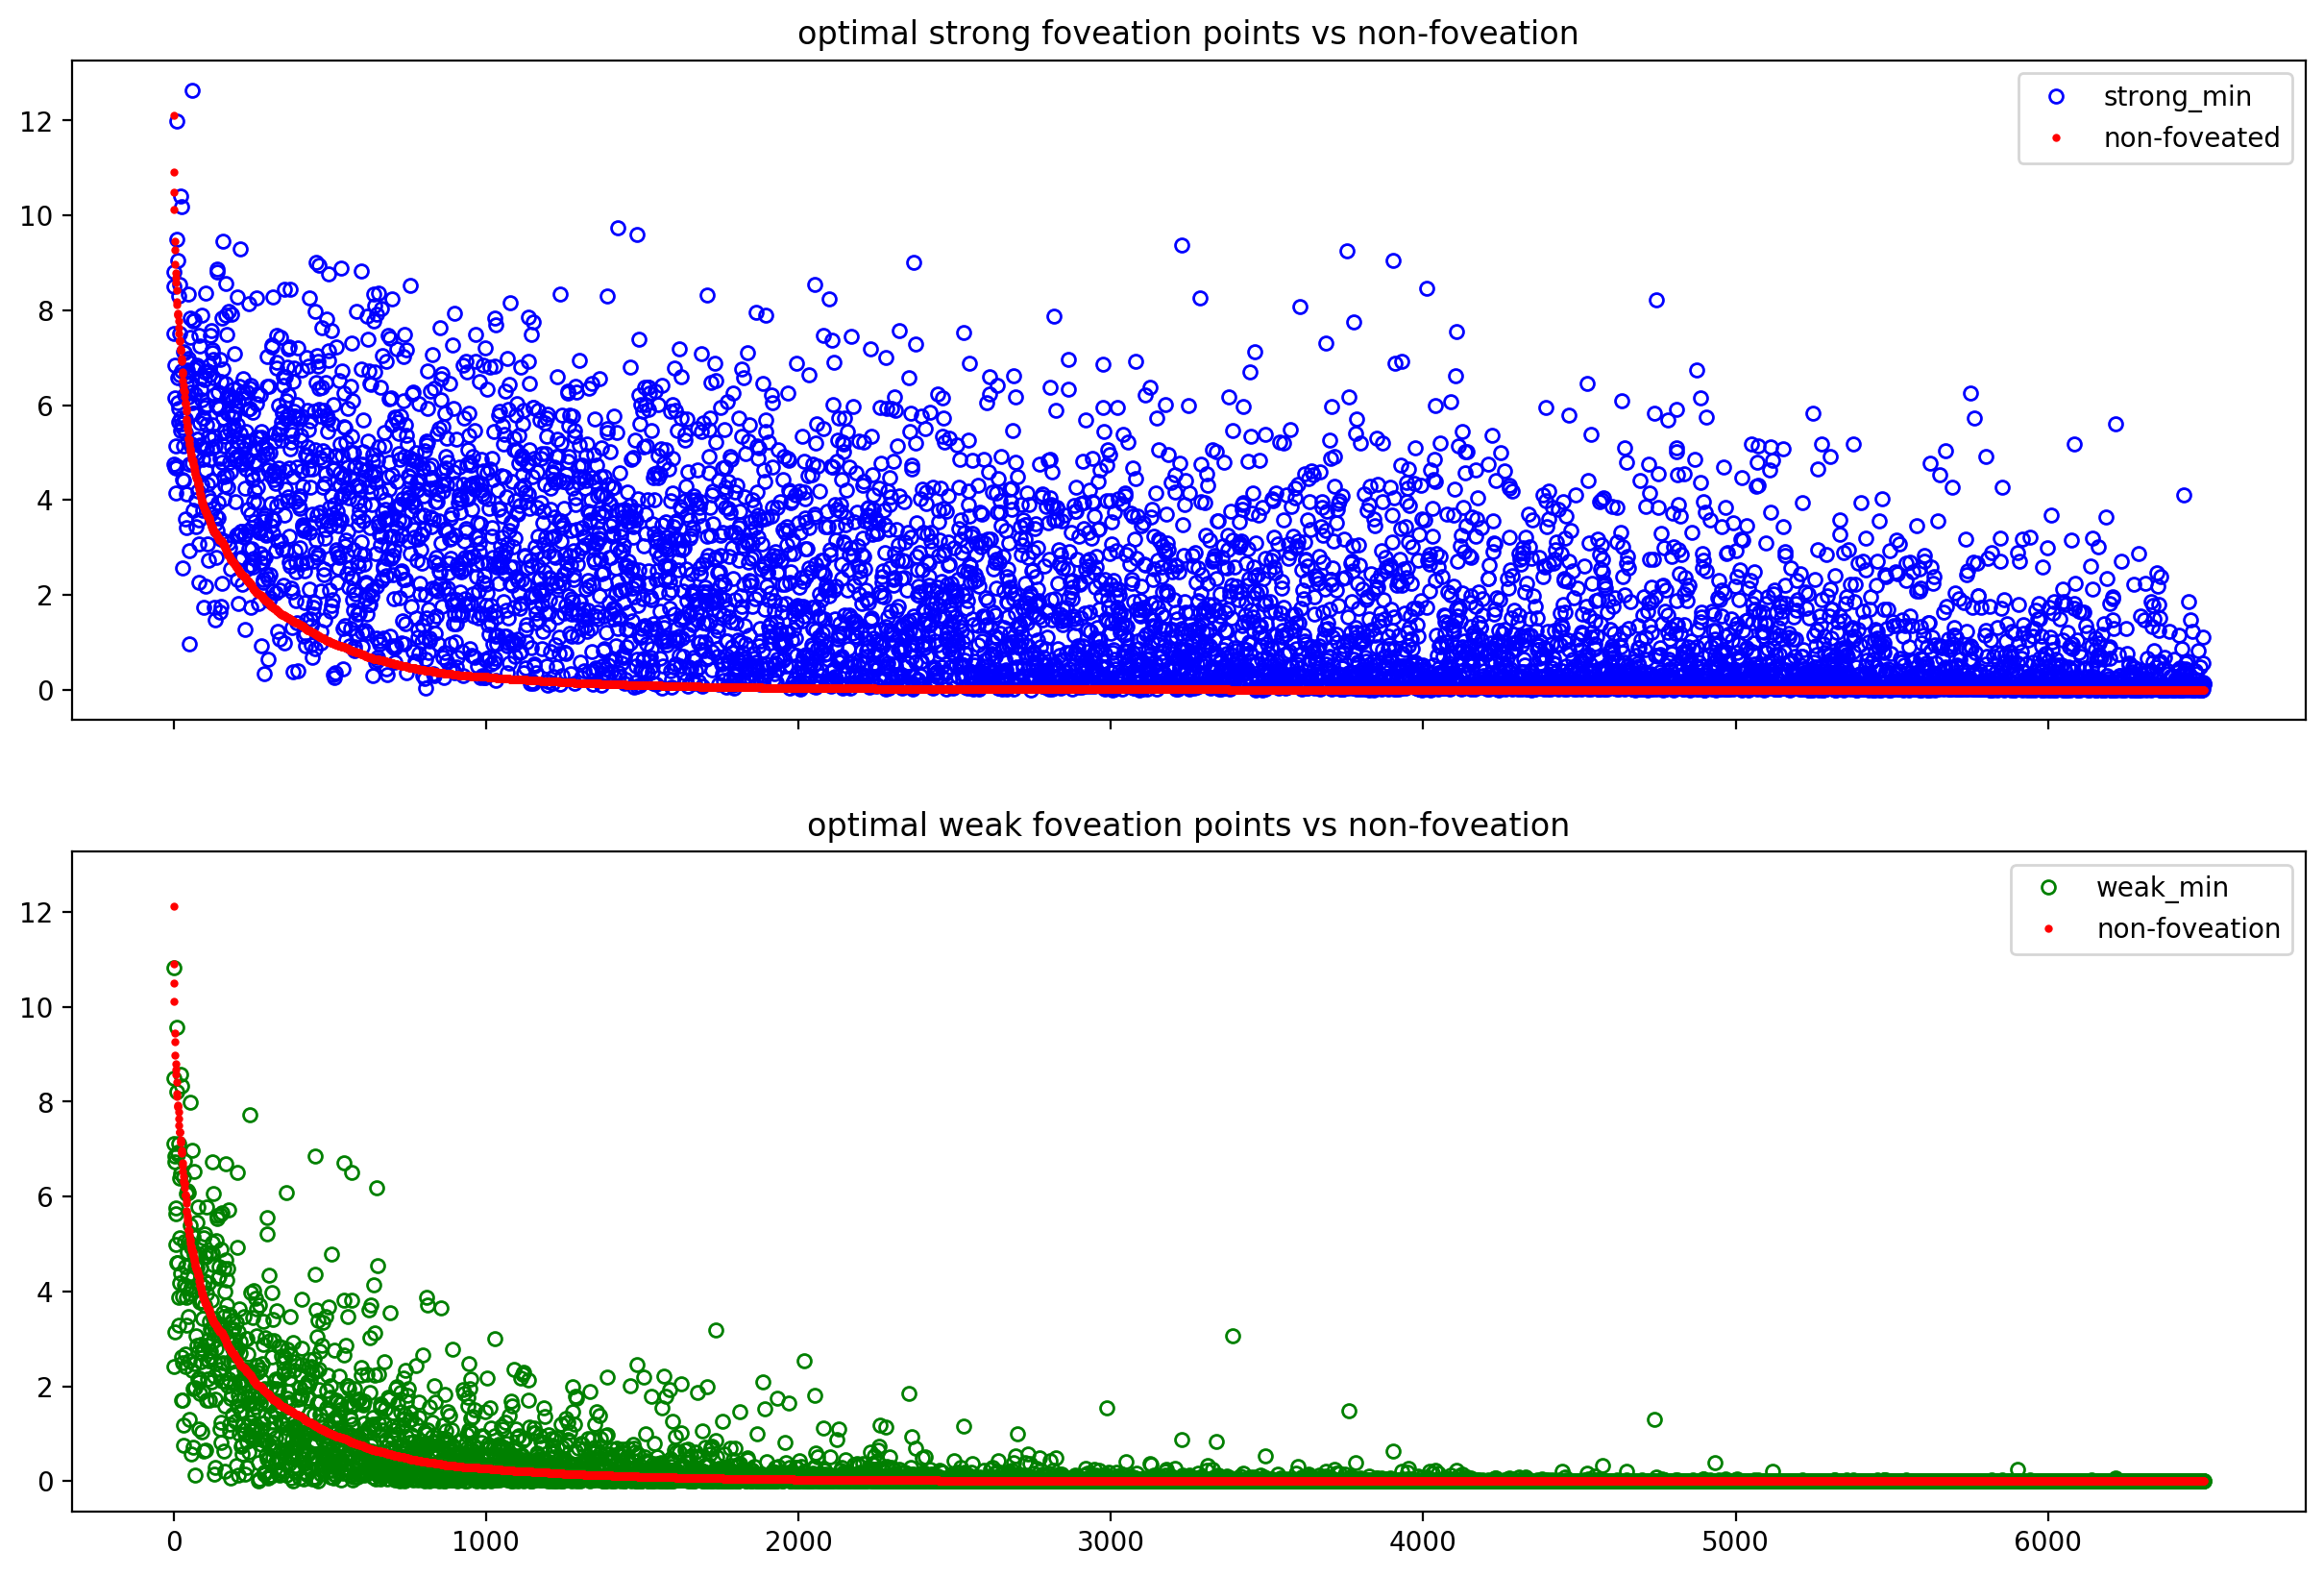

In [6]:
result = df.sort_values('nonfoveated', ascending=False)
result = result.reset_index(drop=True)
# result

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,10), dpi=200)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

ax0 = ax[0]
ax0.plot(result['strong_min'], 'bo', markersize=5, fillstyle='none')
ax0.plot(result['nonfoveated'], 'ro', markersize=2)
ax0.legend(['strong_min', 'non-foveated'])
ax0.set_title('optimal strong foveation points vs non-foveation')

ax1 = ax[1]
ax1.plot(result['weak_min'], 'go', markersize=5, fillstyle='none')
ax1.plot(result['nonfoveated'], 'ro', markersize=2)
ax1.legend(['weak_min', 'non-foveation'])
ax1.set_title('optimal weak foveation points vs non-foveation')

plt.show()

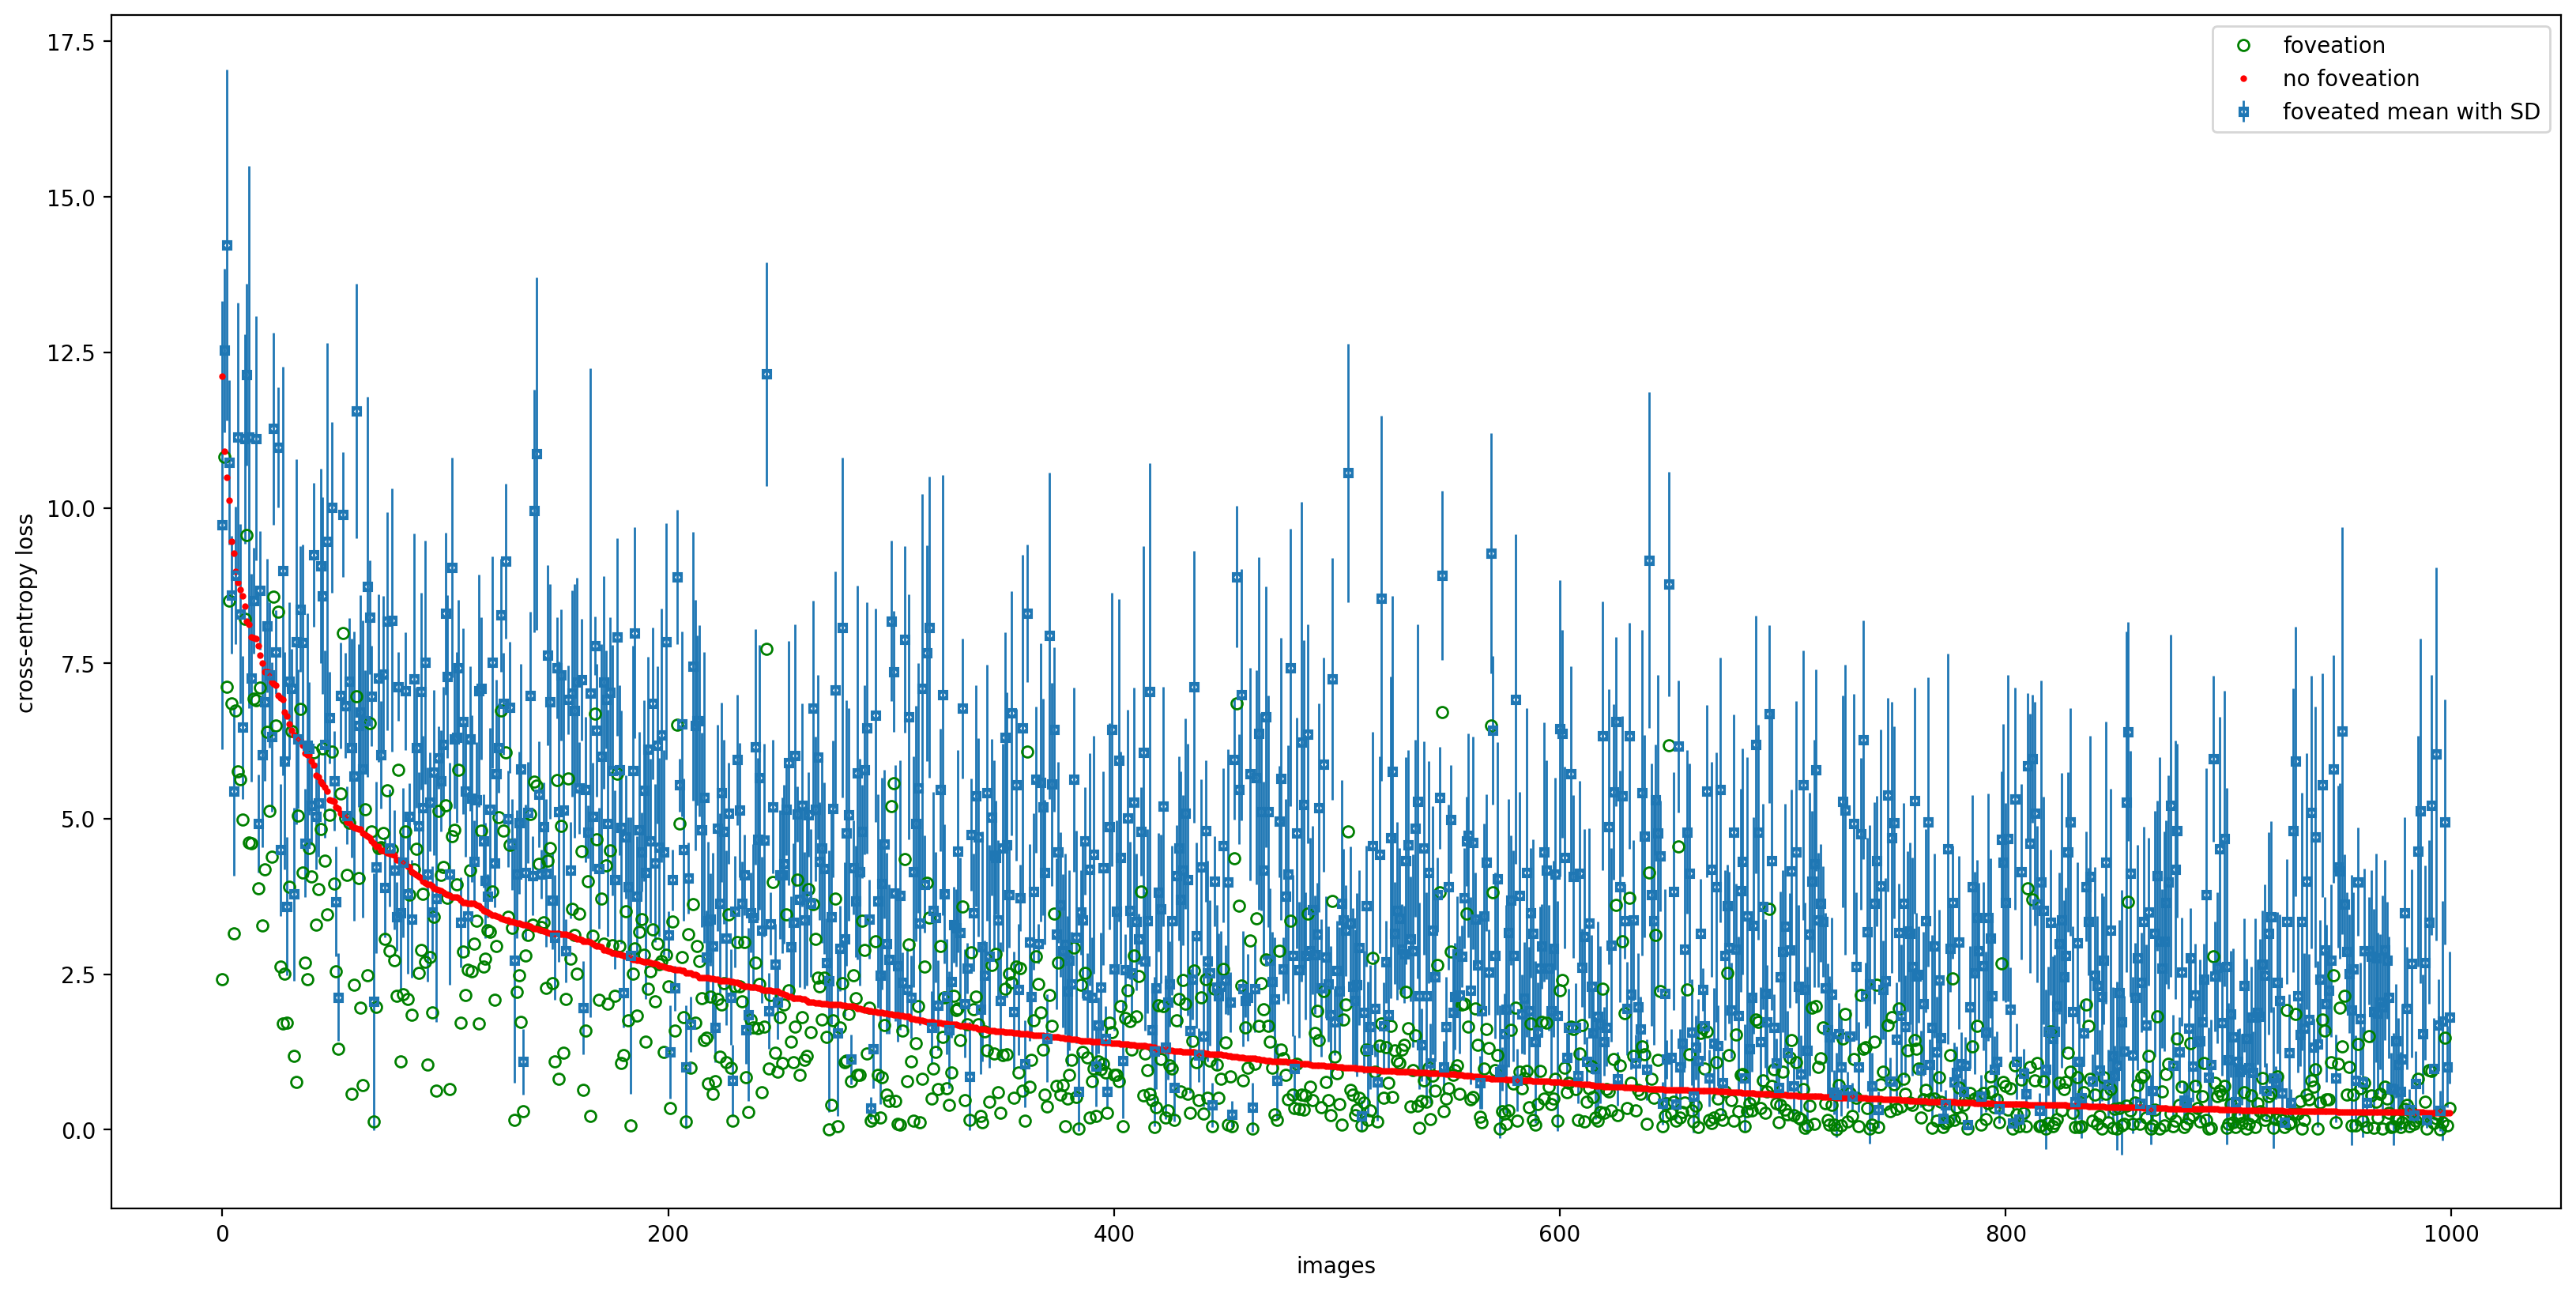

In [7]:
cutoff = 1000

fig=plt.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
plt.plot(result['weak_min'][:cutoff], 'go', markersize=5, fillstyle='none')
plt.plot(result['nonfoveated'][:cutoff], 'ro', markersize=2)
plt.errorbar(x=result.index.tolist()[:cutoff], 
             y=result['weak_mean'][:cutoff],
             yerr=result['weak_std'][:cutoff], 
             linestyle='None', marker='s', ms=1, mew=4, lw=1)

plt.ylabel('cross-entropy loss')
plt.xlabel('images')
plt.legend(['foveation', 'no foveation', 'foveated mean with SD'])
plt.show()
fig.savefig("images/foveation vs no-foveation", bbox_inches='tight')

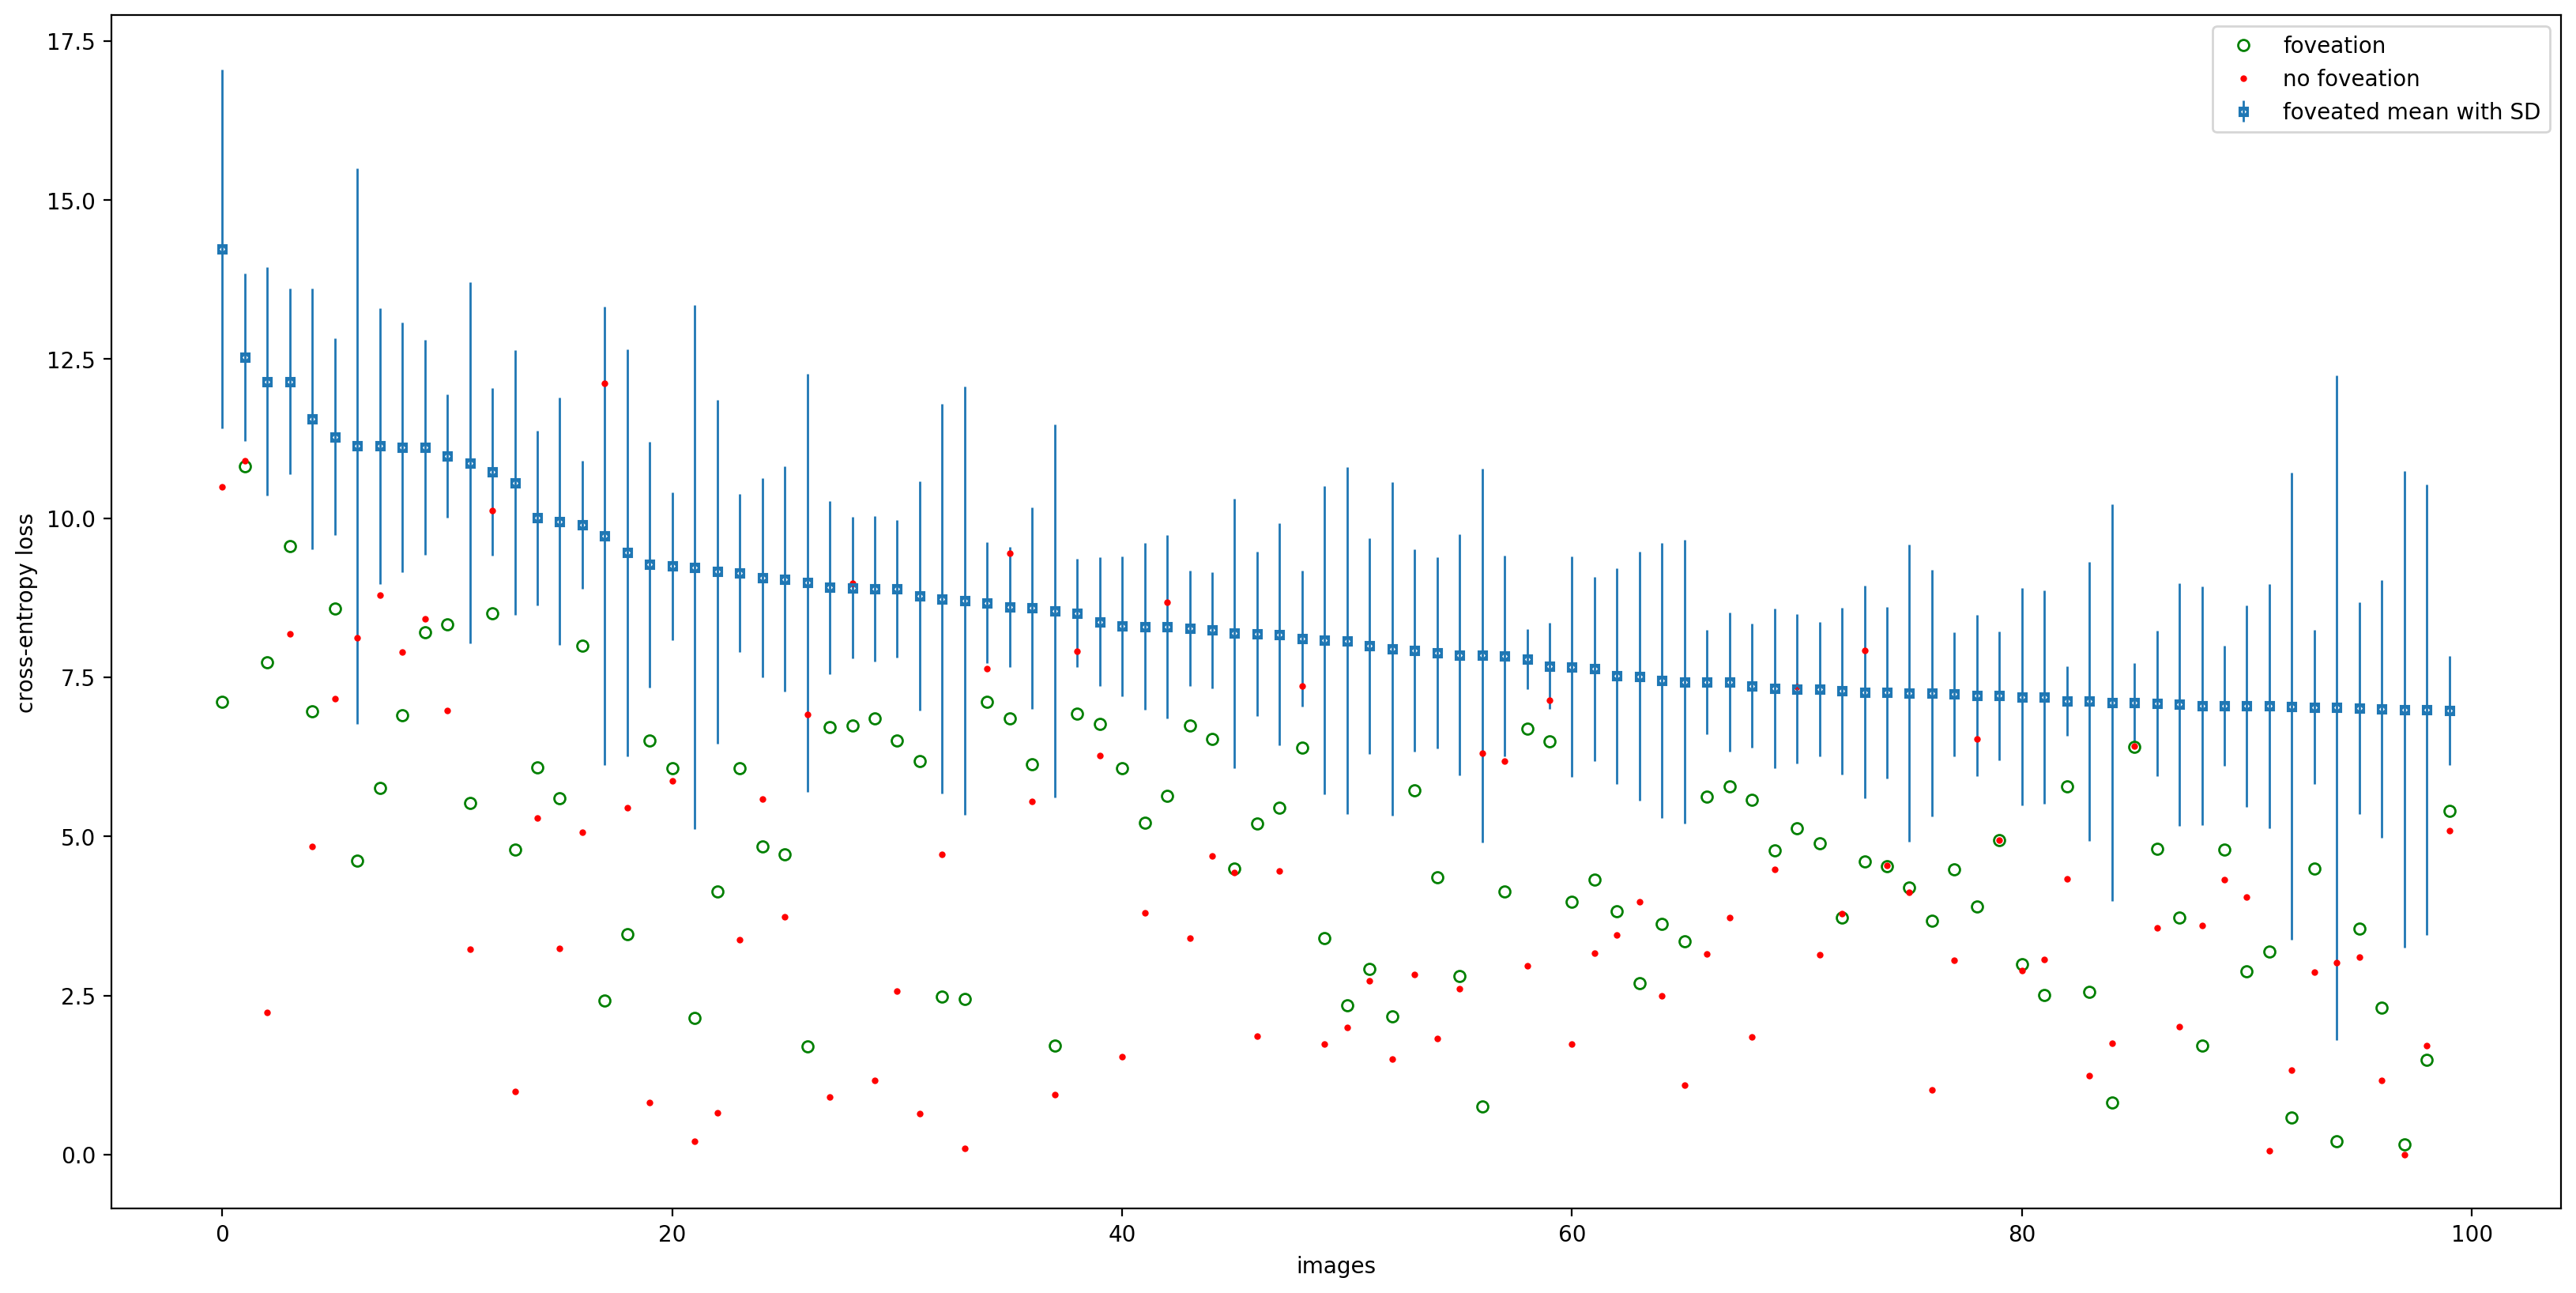

In [8]:
result = temp.sort_values('weak_mean', ascending=False)
result = result.reset_index(drop=True)

cutoff = 100

fig=plt.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
plt.plot(result['weak_min'][:cutoff], 'go', markersize=5, fillstyle='none')
plt.plot(result['nonfoveated'][:cutoff], 'ro', markersize=2)
plt.errorbar(x=result.index.tolist()[:cutoff], 
             y=result['weak_mean'][:cutoff],
             yerr=result['weak_std'][:cutoff], 
             linestyle='None', marker='s', ms=1, mew=4, lw=1)

plt.ylabel('cross-entropy loss')
plt.xlabel('images')
plt.legend(['foveation', 'no foveation', 'foveated mean with SD'])
plt.show()
fig.savefig("images/foveation vs no-foveation", bbox_inches='tight')

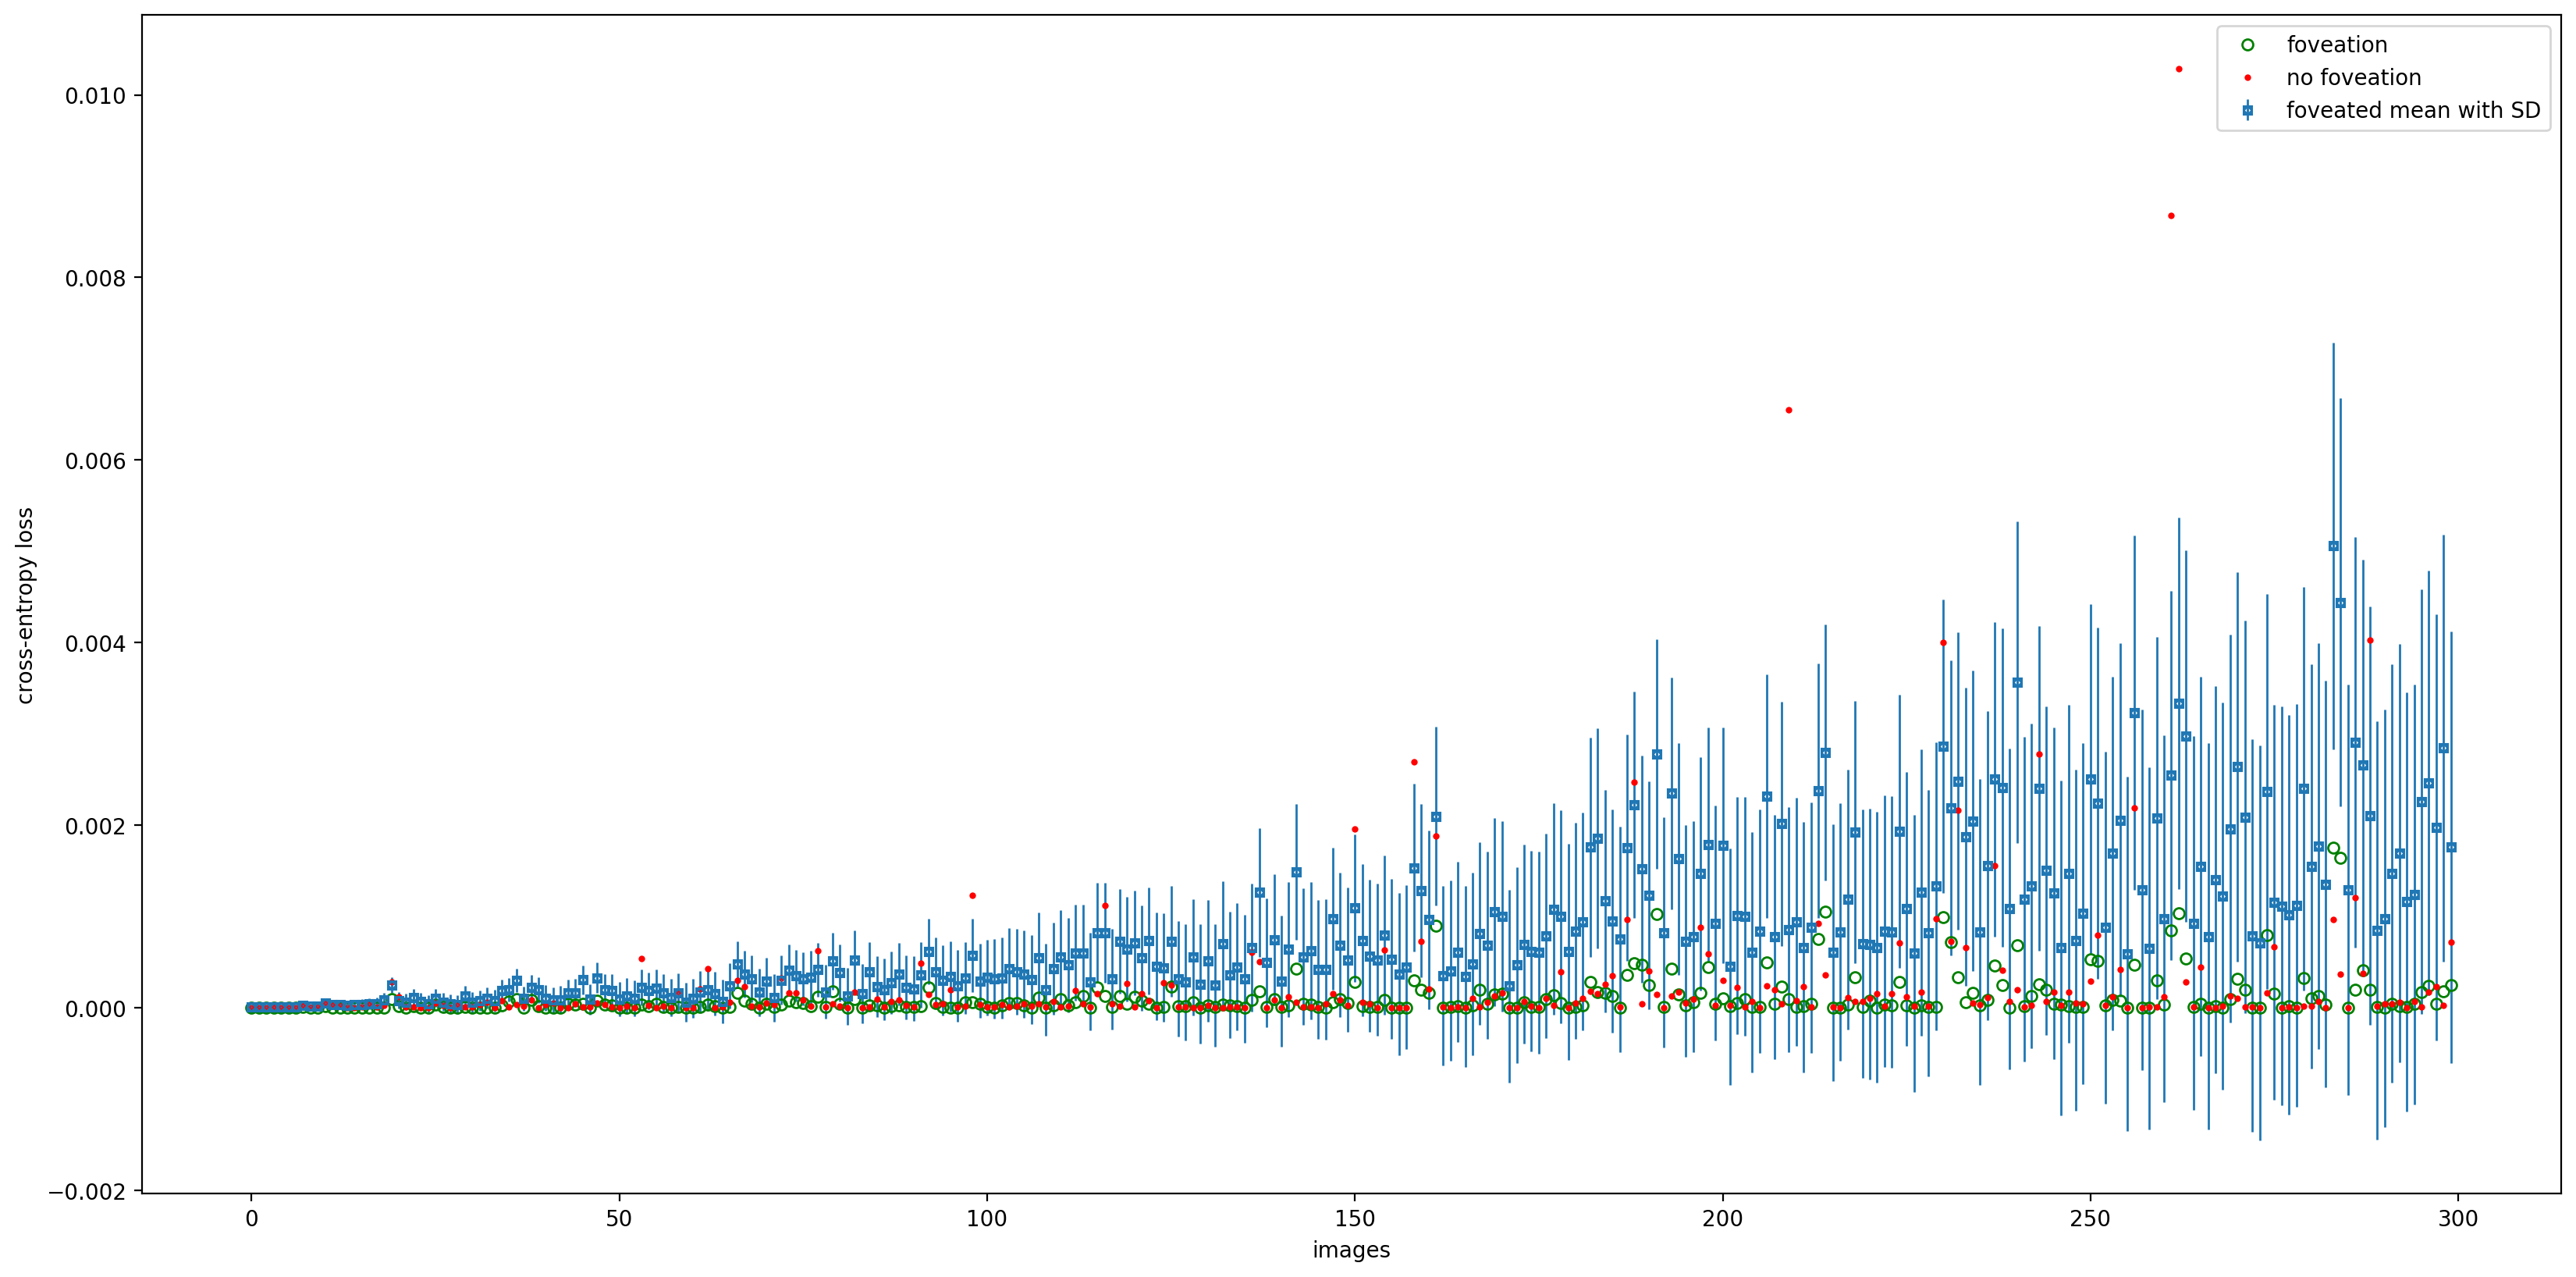

In [9]:
result = temp.sort_values('weak_std', ascending=True)
result = result.reset_index(drop=True)

cutoff = 300

fig=plt.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
plt.plot(result['weak_min'][:cutoff], 'go', markersize=5, fillstyle='none')
plt.plot(result['nonfoveated'][:cutoff], 'ro', markersize=2)
plt.errorbar(x=result.index.tolist()[:cutoff], 
             y=result['weak_mean'][:cutoff],
             yerr=result['weak_std'][:cutoff], 
             linestyle='None', marker='s', ms=1, mew=4, lw=1)

plt.ylabel('cross-entropy loss')
plt.xlabel('images')
plt.legend(['foveation', 'no foveation', 'foveated mean with SD'])
plt.show()
fig.savefig("images/foveation vs no-foveation", bbox_inches='tight')

## Random, center, and min

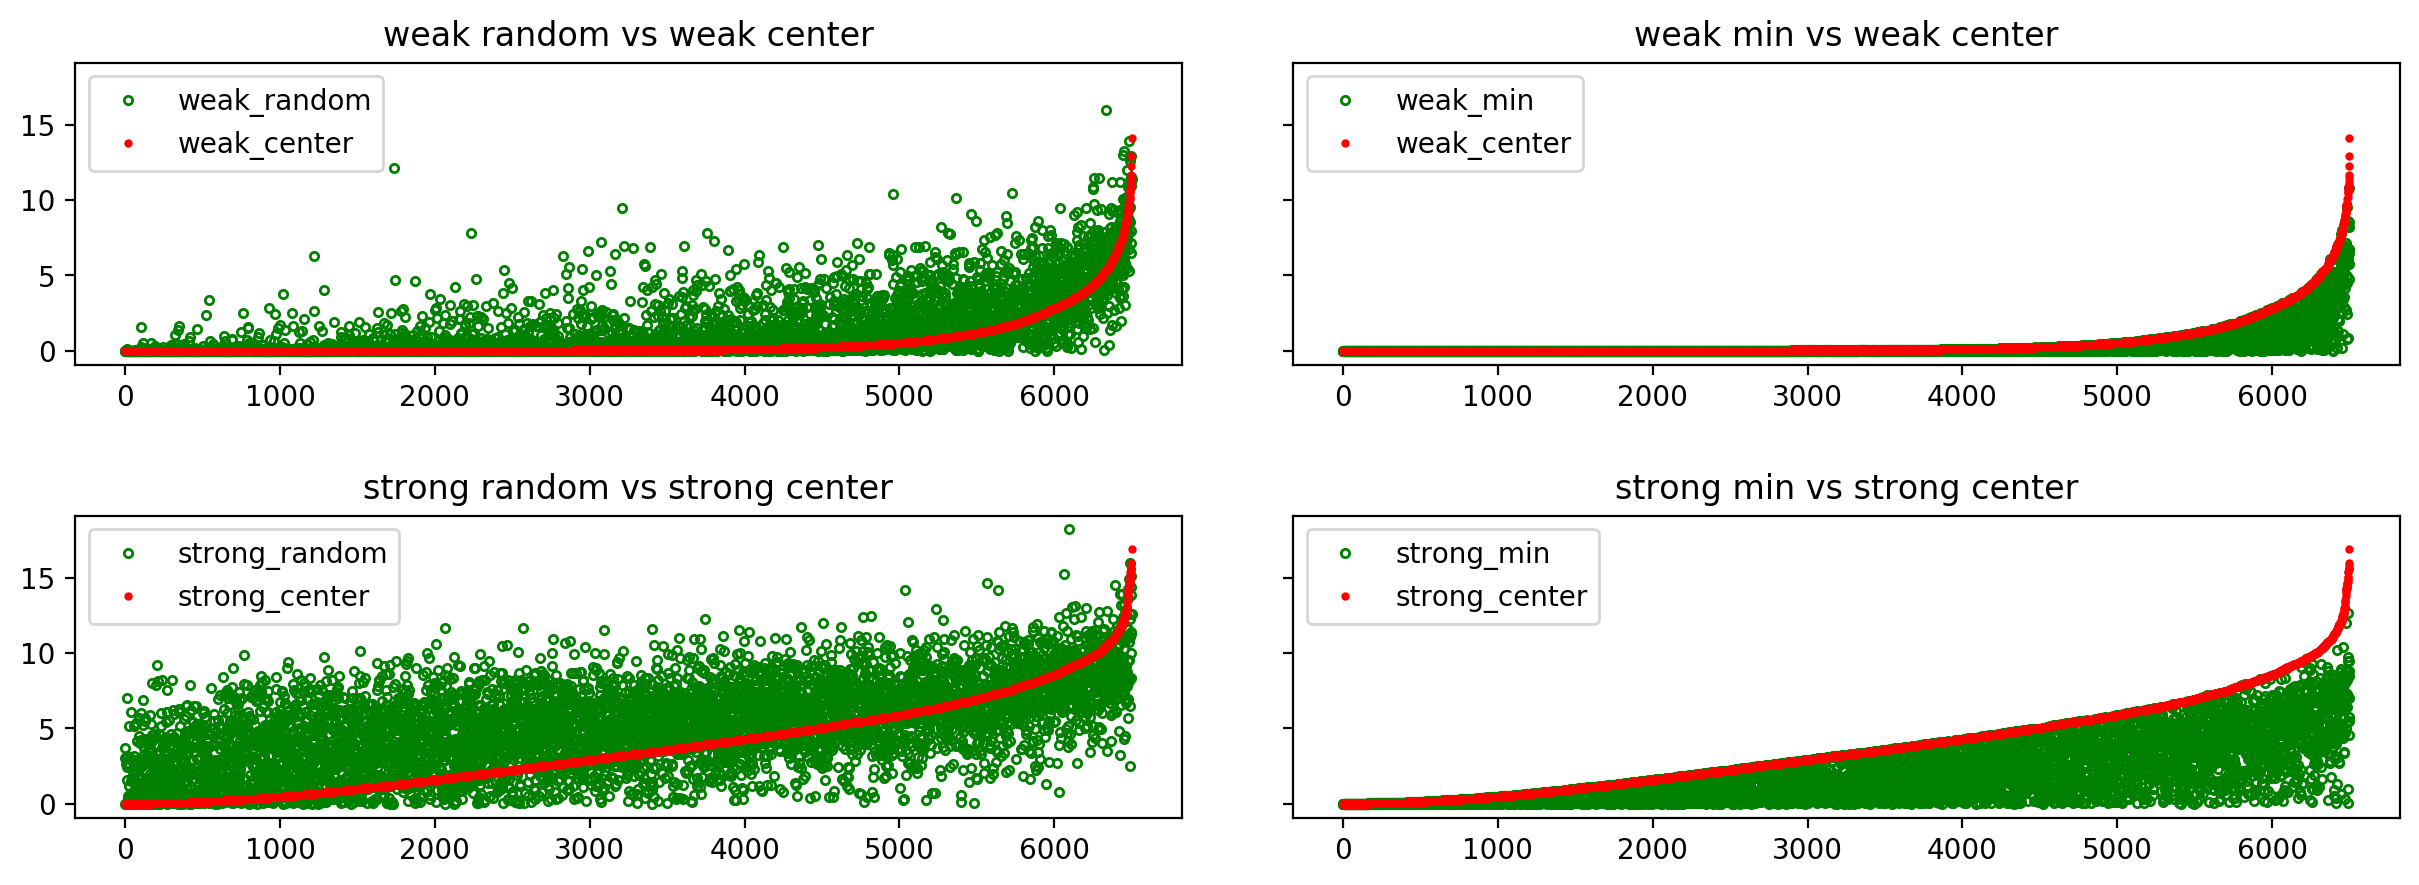

In [10]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,5), dpi=200)
fig.subplots_adjust(wspace=0.1, hspace=0.5)

"WEAK"
result = temp.sort_values('weak_center')
result = result.reset_index(drop=True)

ax00 = ax[0,0]
ax00.plot(result['weak_random'], 'go', markersize=3, fillstyle='none')
ax00.plot(result['weak_center'], 'ro', markersize=2)
ax00.xaxis.set_ticks_position('bottom')
ax00.legend(['weak_random', 'weak_center'])
ax00.set_title('weak random vs weak center')

ax01 = ax[0,1]
ax01.plot(result['weak_min'], 'go', markersize=3, fillstyle='none')
ax01.plot(result['weak_center'], 'ro', markersize=2)
ax01.xaxis.set_ticks_position('bottom')
ax01.legend(['weak_min', 'weak_center'])
ax01.set_title('weak min vs weak center')

"STRONG"
result = temp.sort_values('strong_center')
result = result.reset_index(drop=True)

ax10 = ax[1,0]
ax10.plot(result['strong_random'], 'go', markersize=3, fillstyle='none')
ax10.plot(result['strong_center'], 'ro', markersize=2)
ax10.xaxis.set_ticks_position('bottom')
ax10.legend(['strong_random', 'strong_center'])
ax10.set_title('strong random vs strong center')

ax11 = ax[1,1]
ax11.plot(result['strong_min'], 'go', markersize=3, fillstyle='none')
ax11.plot(result['strong_center'], 'ro', markersize=2)
ax11.xaxis.set_ticks_position('bottom')
ax11.legend(['strong_min', 'strong_center'])
ax11.set_title('strong min vs strong center')

plt.show()

## Foveation locations of min

In [11]:
weak_min_locations = []
for i, row in Q_Table_weak.iterrows():
    row = row[1:].astype('float64')
    weak_min_locations.append(row.idxmin())

strong_min_locations = []
for i, row in Q_Table_strong.iterrows():
    row = row[1:].astype('float64')
    strong_min_locations.append(row.idxmin())

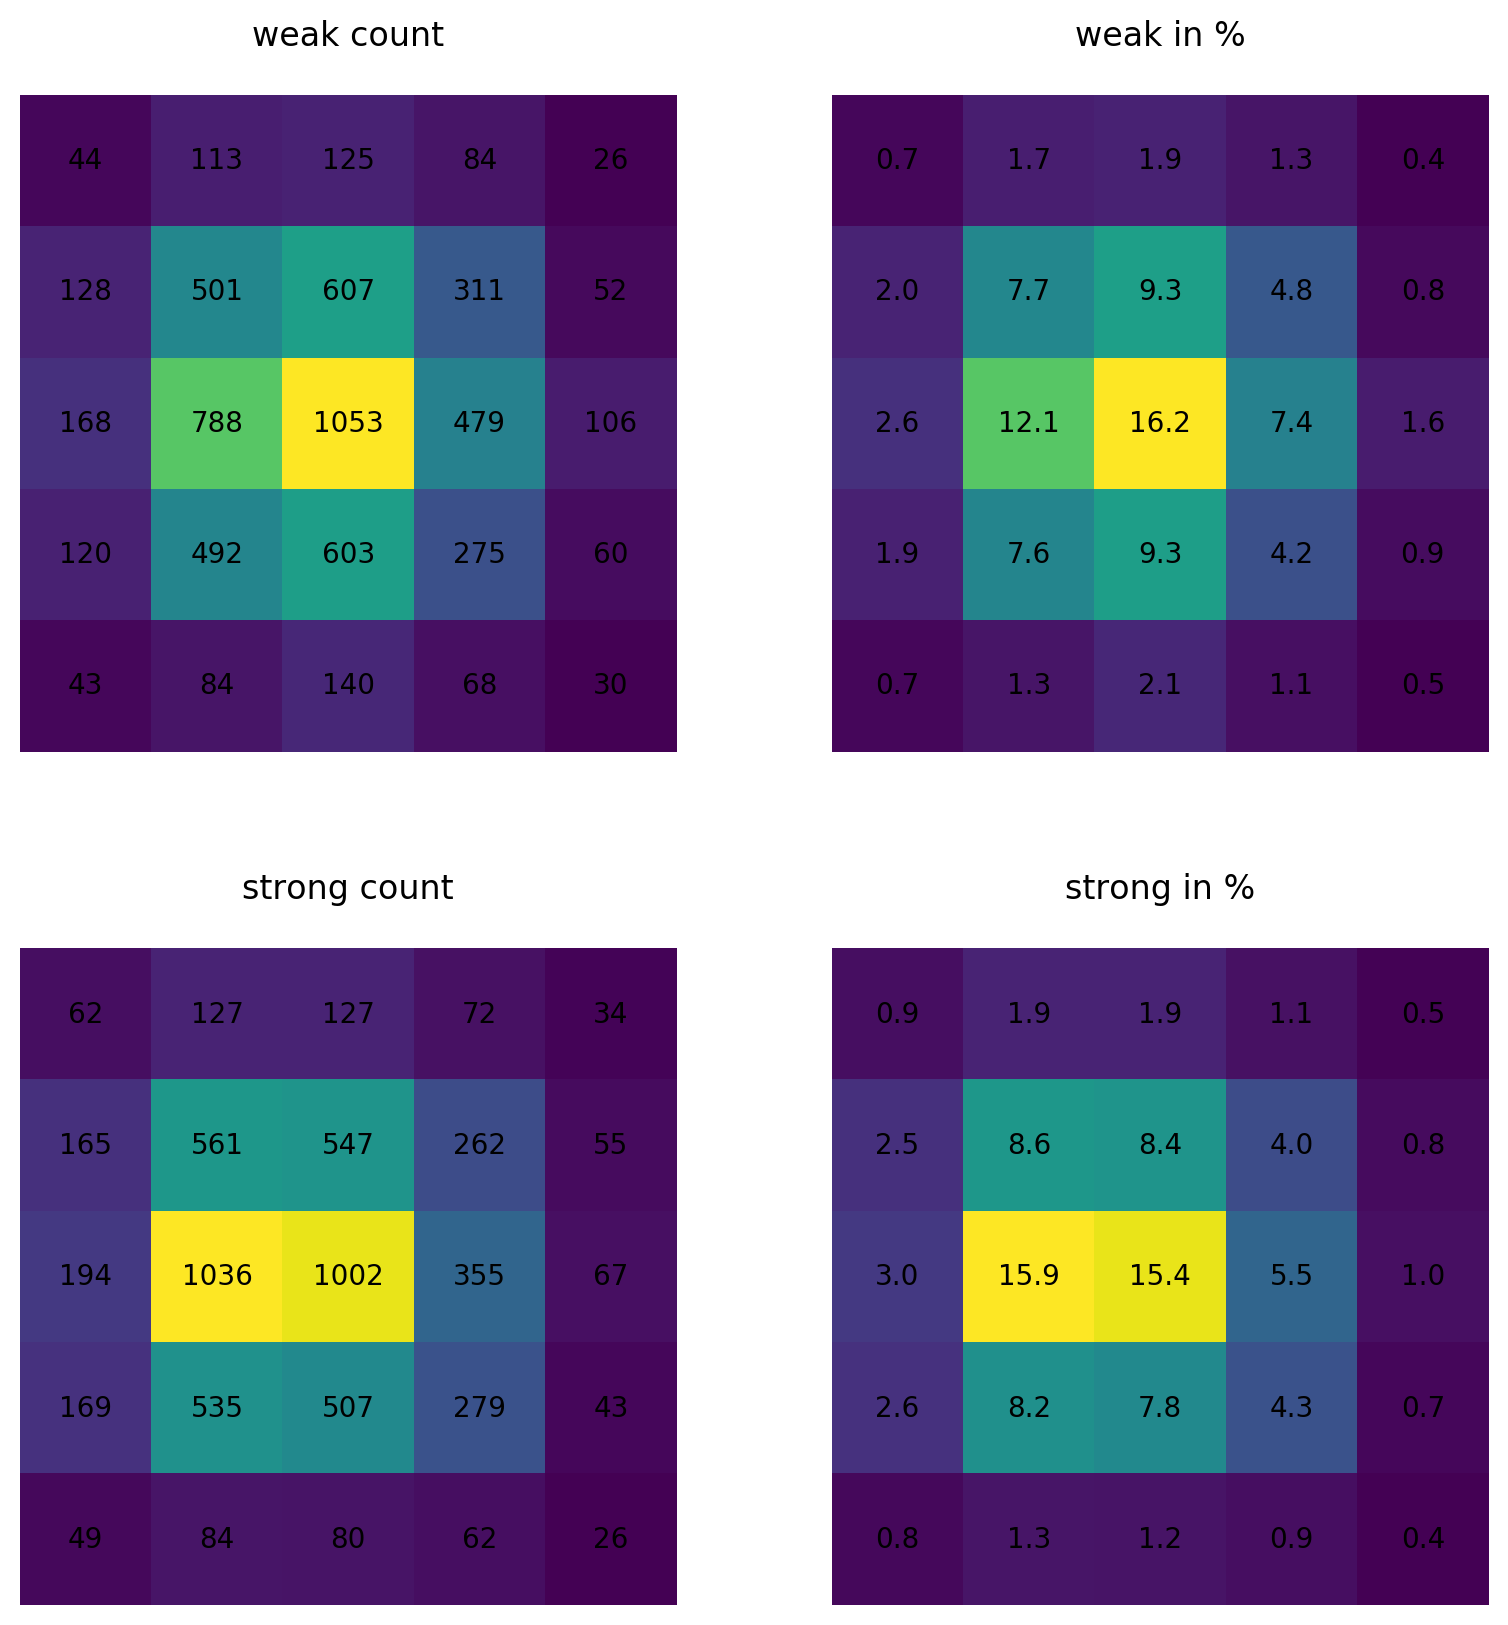

In [12]:
weak_unique, weak_counts = np.unique(weak_min_locations, return_counts=True)
weak_percentages = np.around((weak_counts / sum(weak_counts)) * 100, 2).reshape((5, 5))

strong_unique, strong_counts = np.unique(strong_min_locations, return_counts=True)
strong_percentages = np.around((strong_counts / sum(strong_counts)) * 100, 2).reshape((5, 5))

# Plot
fig, ax = plt.subplots(2, 2, figsize=(10,10), dpi=200, facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.1, hspace=0.3)

ax[0,0].matshow(weak_counts.reshape((5, 5)))
ax[0,0].axis('off')
ax[0,0].set_title('weak count')
for (i, j), z in np.ndenumerate(weak_counts.reshape((5, 5))):
    ax[0,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[0,1].matshow(weak_percentages)
ax[0,1].axis('off')
ax[0,1].set_title('weak in %')
for (i, j), z in np.ndenumerate(weak_percentages):
    ax[0,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
ax[1,0].matshow(strong_counts.reshape((5, 5)))
ax[1,0].axis('off')
ax[1,0].set_title('strong count')
for (i, j), z in np.ndenumerate(strong_counts.reshape((5, 5))):
    ax[1,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[1,1].matshow(strong_percentages)
ax[1,1].axis('off')
ax[1,1].set_title('strong in %')
for (i, j), z in np.ndenumerate(strong_percentages):
    ax[1,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## What are good/bad images to foveate?

In [45]:
total = 6500

better_locations = []
equal_locations = []
worse_locations = []

better_class = []
equal_class = []
worse_class = []

better_imagenames = []
equal_imagenames = []
worse_imagenames = []

for (i, row1), (i, row2) in zip(Q_Table_weak.iterrows(), temp.iterrows()):
       
    lowest_value = row1[1:].min()
    lowest_location = pd.to_numeric(row1[1:]).idxmin()
    image_name = row1[0]
    image_class = image_name.split('_')[0]
    
    # better performance
    if lowest_value < row2['nonfoveated']:
        better_locations.append(lowest_location)
        better_class.append(image_class)
        better_imagenames.append(image_name)
    # equal performance
    elif lowest_value == row2['nonfoveated']:
        equal_locations.append(lowest_location)
        equal_class.append(image_class)
        equal_imagenames.append(image_name)
    # worse performance
    elif lowest_value > row2['nonfoveated']:
        worse_locations.append(lowest_location)
        worse_class.append(image_class)
        worse_imagenames.append(image_name)
    else:
        print("the universe exploded")
        break
        
print('Better performance of foveated images then non-foveated on the 6500 test images: %d %%' % (
100 * len(better_locations) / total))
print('Worse performance of foveated images then non-foveated on the 6500 test images: %d %%' % (
100 * len(worse_locations) / total))

Better performance of foveated images then non-foveated on the 6500 test images: 38 %
Worse performance of foveated images then non-foveated on the 6500 test images: 62 %


### Locations

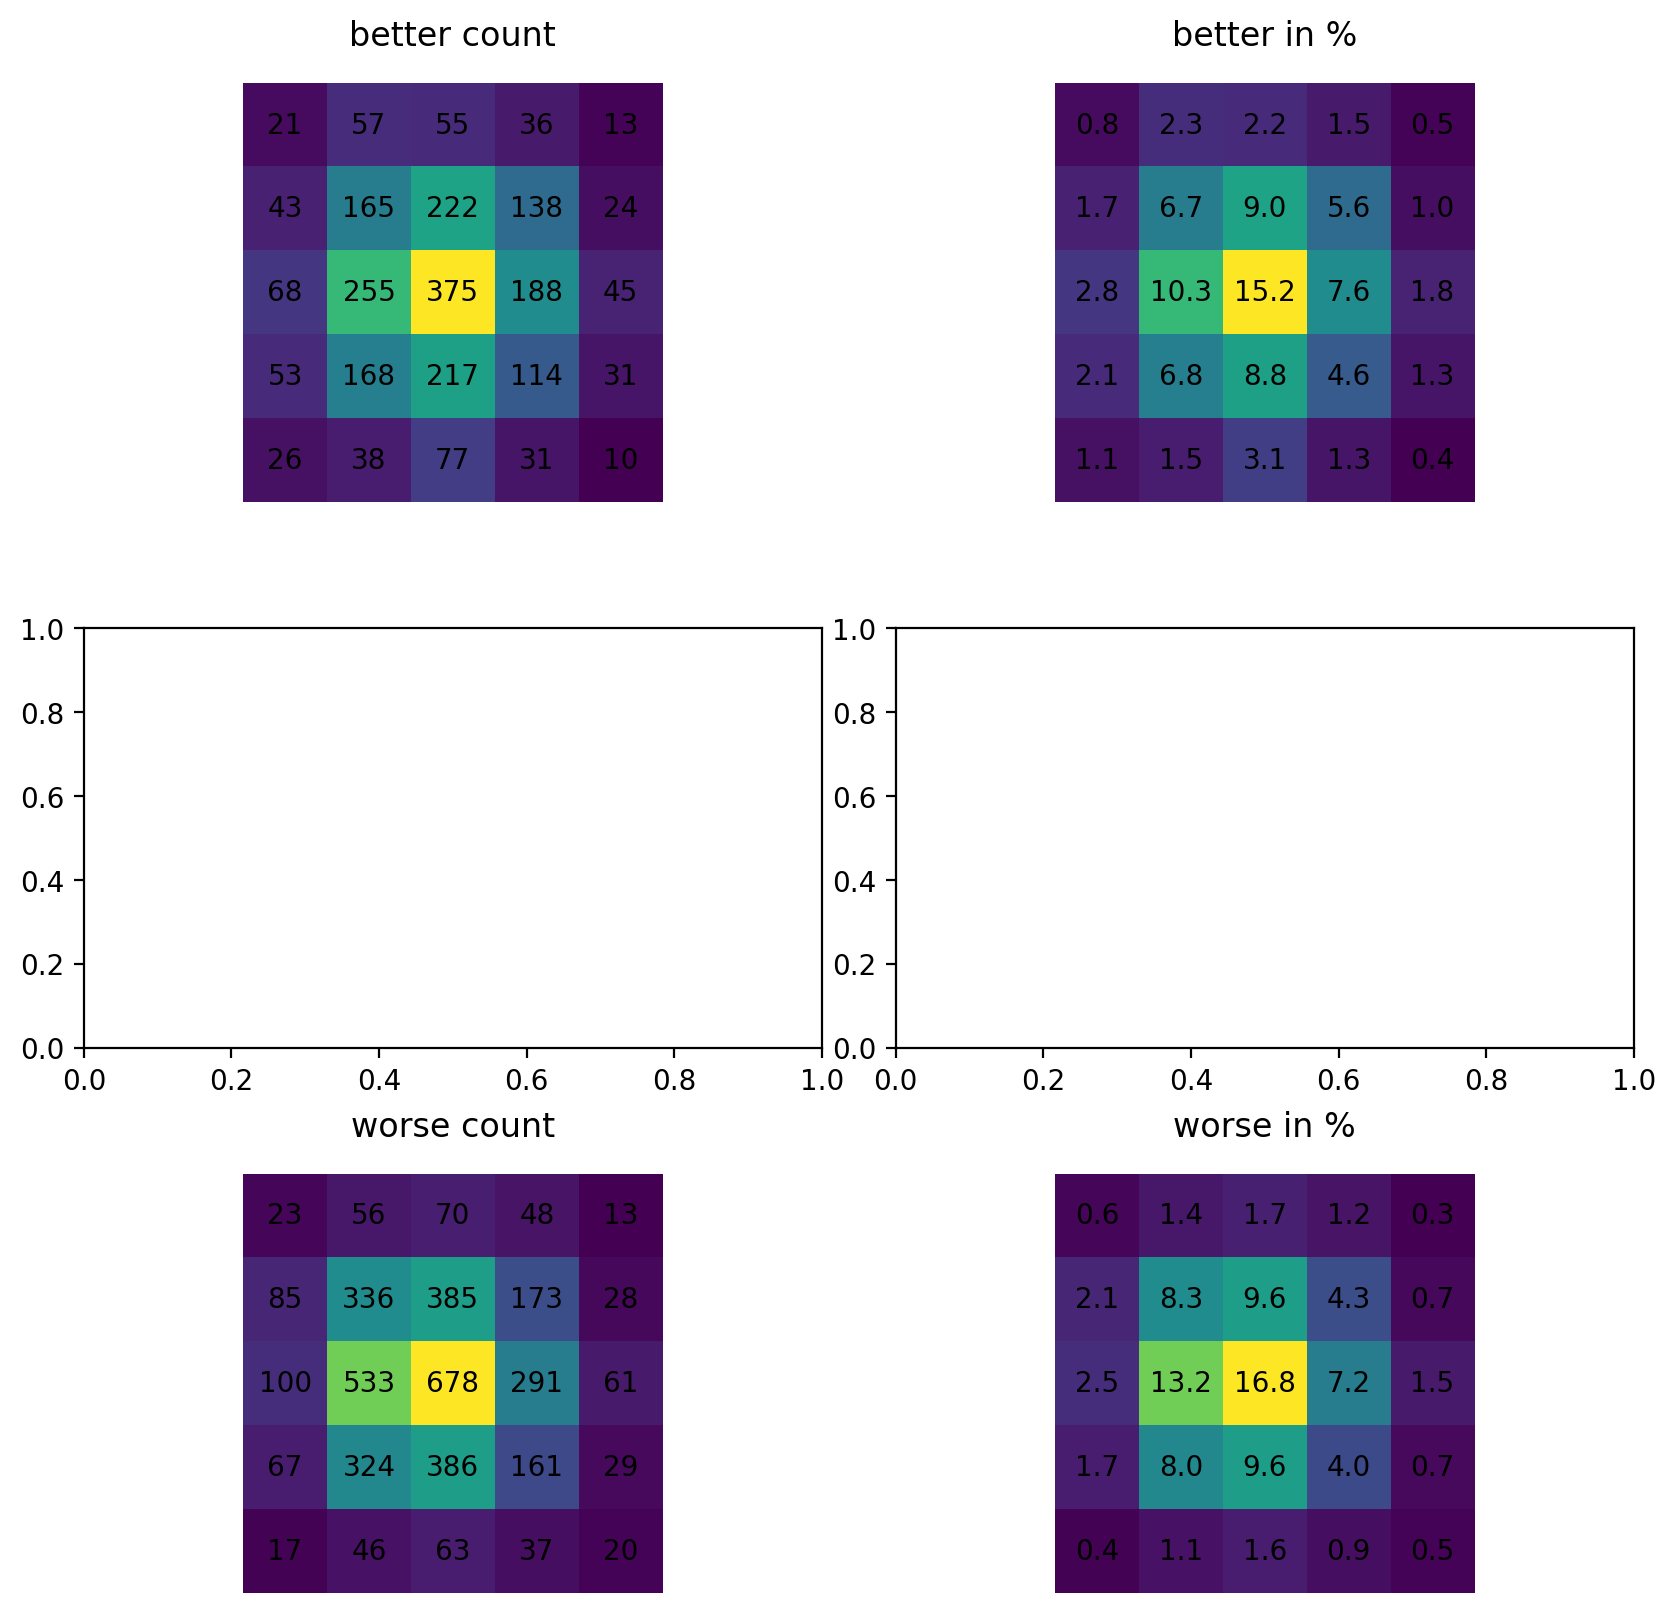

In [26]:
better_unique, better_counts = np.unique(better_locations, return_counts=True)
better_percentages = np.around((better_counts / sum(better_counts)) * 100, 2).reshape((5, 5))

# equal_unique, equal_counts = np.unique(equal_locations, return_counts=True)
# equal_percentages = np.around((equal_counts / sum(equal_counts)) * 100, 2).reshape((5, 5))

worse_unique, worse_counts = np.unique(worse_locations, return_counts=True)
worse_percentages = np.around((worse_counts / sum(worse_counts)) * 100, 2).reshape((5, 5))

# Plot
fig, ax = plt.subplots(3, 2, figsize=(10,10), dpi=200, facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.1, hspace=0.3)

ax[0,0].matshow(better_counts.reshape((5, 5)))
ax[0,0].axis('off')
ax[0,0].set_title('better count')
for (i, j), z in np.ndenumerate(better_counts.reshape((5, 5))):
    ax[0,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[0,1].matshow(better_percentages)
ax[0,1].axis('off')
ax[0,1].set_title('better in %')
for (i, j), z in np.ndenumerate(better_percentages):
    ax[0,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
# ax[1,0].matshow(equal_counts.reshape((5, 5)))
# ax[1,0].axis('off')
# ax[1,0].set_title('equal count')
# for (i, j), z in np.ndenumerate(equal_counts.reshape((5, 5))):
#     ax[1,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
# ax[1,1].matshow(equal_percentages)
# ax[1,1].axis('off')
# ax[1,1].set_title('equal in %')
# for (i, j), z in np.ndenumerate(equal_percentages):
#     ax[1,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
ax[2,0].matshow(worse_counts.reshape((5, 5)))
ax[2,0].axis('off')
ax[2,0].set_title('worse count')
for (i, j), z in np.ndenumerate(worse_counts.reshape((5, 5))):
    ax[2,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[2,1].matshow(worse_percentages)
ax[2,1].axis('off')
ax[2,1].set_title('worse in %')
for (i, j), z in np.ndenumerate(worse_percentages):
    ax[2,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

### Classes

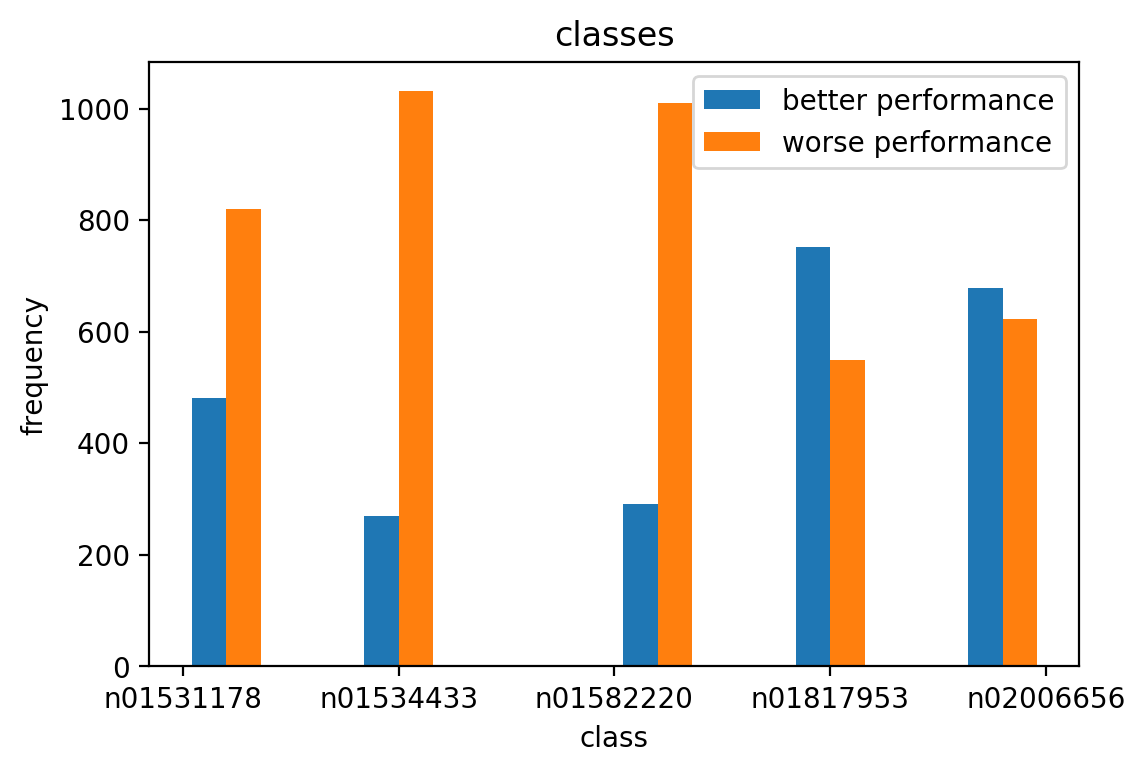

In [42]:
better_unique, better_counts = np.unique(better_class, return_counts=True)
better_percentages = np.around((better_counts / sum(better_counts)) * 100, 2)

worse_unique, worse_counts = np.unique(worse_class, return_counts=True)
worse_percentages = np.around((worse_counts / sum(worse_counts)) * 100, 2)

fig=plt.figure(dpi=200, facecolor='w', edgecolor='k')
plt.hist([better_class, worse_class])
plt.title('classes')
plt.legend(['better performance', 'worse performance'])
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()

### Images

In [47]:
# print(better_imagenames)
# print(worse_images)




['n01531178_1006', 'n01531178_10178', 'n01531178_10271', 'n01531178_1059', 'n01531178_10690', 'n01531178_10738', 'n01531178_10755', 'n01531178_10798', 'n01531178_10838', 'n01531178_10937', 'n01531178_10962', 'n01531178_11071', 'n01531178_11081', 'n01531178_11270', 'n01531178_11290', 'n01531178_11311', 'n01531178_11317', 'n01531178_11345', 'n01531178_11416', 'n01531178_11423', 'n01531178_11576', 'n01531178_11630', 'n01531178_11645', 'n01531178_1175', 'n01531178_11758', 'n01531178_11819', 'n01531178_1194', 'n01531178_1199', 'n01531178_12016', 'n01531178_1214', 'n01531178_12200', 'n01531178_1222', 'n01531178_12237', 'n01531178_12268', 'n01531178_12332', 'n01531178_12342', 'n01531178_12390', 'n01531178_12486', 'n01531178_12579', 'n01531178_12589', 'n01531178_12608', 'n01531178_12671', 'n01531178_12734', 'n01531178_12736', 'n01531178_12752', 'n01531178_12753', 'n01531178_12846', 'n01531178_12895', 'n01531178_12971', 'n01531178_13047', 'n01531178_13095', 'n01531178_13188', 'n01531178_13218',

NameError: name 'worse_images' is not defined